___
# PROJETO 1

## <font color='red'>Rodrigo Cavalieri Lino</font>
___

## <font color='blue'>Ser aposentado no Nordeste é pior do que ser aposentado no Suldeste em 2014 ?</font>

## Introdução

Escolhi trabalhar analisando a diferença entre os aposentados do Sudeste com os do Nordeste, pois a emigração desta última região vem diminuindo ao longo do tempo. Logo quis comparar a situação dos aposentados deste local com os aposentados do principal destino dos emigrantes, além de comparar com os aposentados do Brasil de forma geral. 
 
 Para isso escolhi analisar apenas aposentados com renda declarada, olhando sua cor, sua posição na família, região de moradia, renda, gênero e idade.

___
## Análise e Resultados

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [9]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\digol\Desktop\Projeto1


In [10]:
#Leitura da base já em formato de DataFrame e extensão .csv
PNAD2014 = pd.read_csv('PES2014.csv', sep=',')

___

In [11]:
PNAD2014.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3,500,3,3,1,2,2,1,500,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3,500,3,4,2,NaN,2,1,500,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3,500,3,1,NaN,NaN,NaN,NaN,500,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2,1150,4,2,1,2,2,1,1150,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2,1150,4,3,1,2,2,1,1150,20160623


In [12]:
dados2014=pd.DataFrame()
n=PNAD2014.shape[0]

In [13]:
dados2014["regiao"]=PNAD2014.UF[(PNAD2014.V4720!=999999999999)&(~PNAD2014.V4720.isnull())& (PNAD2014.V9122==2)] #Regiões
dados2014["UF"]=PNAD2014.UF[(PNAD2014.V4720!=999999999999)&(~PNAD2014.V4720.isnull())& (PNAD2014.V9122==2)] #Regiões
dados2014["idade"]=PNAD2014.V8005[(PNAD2014.V4720!=999999999999)&(~PNAD2014.V4720.isnull())& (PNAD2014.V9122==2)] #idade em anos da pessoa
dados2014["posicao_fam"]=PNAD2014.V0402[(PNAD2014.V4720!=999999999999)&(~PNAD2014.V4720.isnull())& (PNAD2014.V9122==2)] #Posição na família
dados2014["cor"]=PNAD2014.V0404[(PNAD2014.V4720!=999999999999)&(~PNAD2014.V4720.isnull())& (PNAD2014.V9122==2)] #Cor ou Raça
dados2014["genero"]=PNAD2014.V0302[(PNAD2014.V4720!=999999999999)&(~PNAD2014.V4720.isnull())& (PNAD2014.V9122==2)] #Gênero
dados2014["rend"]=PNAD2014.V4720[(PNAD2014.V4720!=999999999999)&(~PNAD2014.V4720.isnull())& (PNAD2014.V9122==2)] #Rendimento mensal 

In [14]:
dados2014.head()

,regiao,UF,idade,posicao_fam,cor,genero,rend
5,11,11,77,1,2,4,724
11,11,11,68,1,8,4,724
25,11,11,65,1,2,2,2224
26,11,11,62,2,8,4,2500
51,11,11,90,4,4,2,724


In [15]:
#REGIÃO
dados2014.regiao[(dados2014.UF >=40) & (dados2014.UF<50)]=1
dados2014.regiao[(dados2014.UF >=30) & (dados2014.UF<40)]=2
dados2014.regiao[(dados2014.UF >=50) & (dados2014.UF<60)]=3
dados2014.regiao[(dados2014.UF >=20) & (dados2014.UF<30)]=4
dados2014.regiao[(dados2014.UF >=10) & (dados2014.UF<20)]=5

C:\Users\digol\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\digol\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\digol\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\digol\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWa

In [16]:
dados2014.regiao=dados2014.regiao.astype('category')
dados2014.regiao.cat.categories=('Sul','Sudeste','Centro-Oeste','Nordeste','Norte')
dados2014.regiao.value_counts()

Sudeste         12121
Nordeste        10708
Sul              7781
Norte            3903
Centro-Oeste     3196
dtype: int64

In [17]:
dados2014.posicao_fam.value_counts(True)

1    0.651330
2    0.247978
4    0.080193
3    0.016919
5    0.002917
7    0.000345
6    0.000318
Name: posicao_fam, dtype: float64

In [18]:
#Posição na família
dados2014.posicao_fam=dados2014.posicao_fam.astype('category')
dados2014.posicao_fam.cat.categories=('Chefe da casa','Cônjuge','Filho','Outro parente','Agregado',"Pensionista",'Empregado doméstico')
dados2014.posicao_fam.value_counts(True)

Chefe da casa          0.651330
Cônjuge                0.247978
Outro parente          0.080193
Filho                  0.016919
Agregado               0.002917
Empregado doméstico    0.000345
Pensionista            0.000318
dtype: float64

In [19]:
#cor ou raça
dados2014.cor=dados2014.cor.astype('category')
dados2014.cor.cat.categories=('Branca','Preta','Amarela','Parda','Indígena')
dados2014.cor.value_counts()

Preta       19149
Indígena    14844
Amarela      3370
Parda         206
Branca        140
dtype: int64

In [20]:
#Gênero 
dados2014.genero=dados2014.genero.astype('category')
dados2014.genero.cat.categories=('Masculino','Feminino')
dados2014.genero.value_counts()

Feminino     19244
Masculino    18465
dtype: int64

In [21]:
print('Pos fam')
ut=(dados2014.posicao_fam.value_counts(True)*100).round(decimals=1)
print(ut)


Pos fam
Chefe da casa          65.1
Cônjuge                24.8
Outro parente           8.0
Filho                   1.7
Agregado                0.3
Empregado doméstico     0.0
Pensionista             0.0
dtype: float64


## Análise no Brasil
Inicialmente decide olhar alguns dados com todos os aposentados com renda do Brasil, para possuir uma noção de como esta a situação dos aposentados no país antes de analisar regiões específicas.

Feminino     51
Masculino    49
dtype: float64 



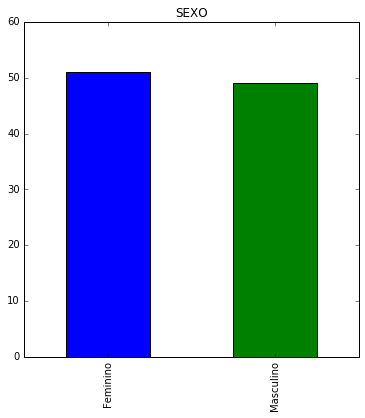

In [22]:
ut0=(dados2014.genero.value_counts(True)*100).round(decimals=1)
print(ut0,'\n')
plot=ut0.plot(kind="bar", title = "SEXO", figsize = (6,6), color = ("b", "g"))

Preta       50.8
Indígena    39.4
Amarela      8.9
Parda        0.5
Branca       0.4
dtype: float64 



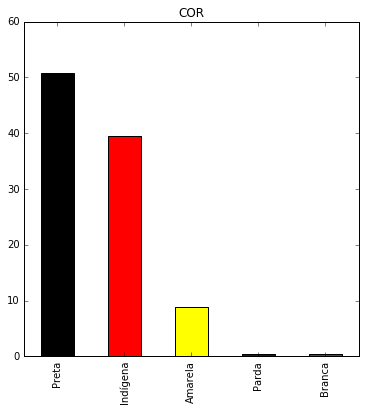

In [23]:
ut1=(dados2014.cor.value_counts(True)*100).round(decimals=1)
print(ut1,'\n')
plot=ut1.plot(kind="bar", title = "COR", figsize = (6,6),color=("k","r","yellow","b","g"))

In [24]:
reg_cor=pd.crosstab( dados2014.regiao,dados2014.cor)
reg_cor


cor,Branca,Preta,Amarela,Parda,Indígena
regiao,,,,,
Sul,16,6372,328,52,1013
Sudeste,17,7100,1195,113,3696
Centro-Oeste,15,1490,269,17,1405
Nordeste,42,3156,1243,10,6257
Norte,50,1031,335,14,2473


In [25]:
print(dados2014.idade.describe(),'\n')
dados2014.rend.describe()

count    37709.000000
mean        67.411095
std         10.576550
min         11.000000
25%         61.000000
50%         67.000000
75%         74.000000
max        112.000000
Name: idade, dtype: float64 



count     37709.000000
mean       1926.271739
std        3301.445636
min         610.000000
25%         724.000000
50%         950.000000
75%        1824.000000
max      331200.000000
Name: rend, dtype: float64

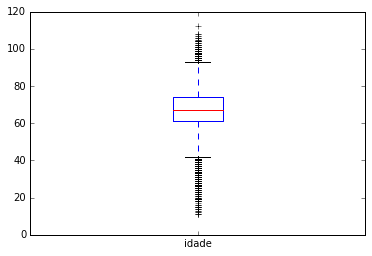

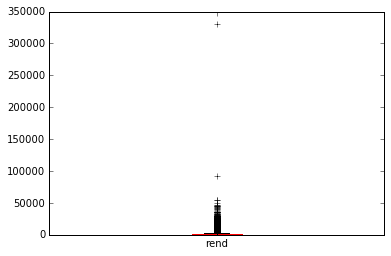

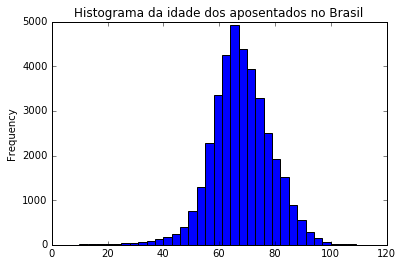

In [26]:
plot=dados2014.idade.plot.box()
plt.show()
plot=dados2014.rend.plot.box()
plt.show()
faixa_idade=np.arange(10,113,3)
plot=dados2014.idade.plot.hist(bins=faixa_idade)
plt.title('Histograma da idade dos aposentados no Brasil')
plt.show()

Sudeste         32.1
Nordeste        28.4
Sul             20.6
Norte           10.4
Centro-Oeste     8.5
dtype: float64 



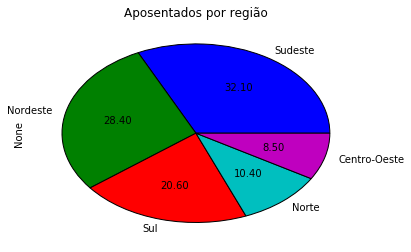

In [27]:
#distribuição dos aposentados pelo país
ut2=(dados2014.regiao.value_counts(True)*100).round(decimals=1)
print(ut2,'\n')
ut2.plot(kind='pie',title='Aposentados por região',autopct="%0.2f")

Observando os resultados, percebemos que a maioria dos aposentados são mulheres (o que já era esperado), mais da metade desta população esta localizada nas regiões Sudeste e Nordeste (reforsando uma possível coparação entre eles), a maioria dos aposentados são negros, indigenas e amarelos (resultado não esperado, já que a maioria da população brasileira é parda e branca), a média da idade dos aposentados é de 67,4 anos e a méda da renda é de R$ 1926.2.

___
## Análise Nordeste e Sudeste
Agora já está divido os aposentados do Nordeste e do Sudeste

Renda Nordeste
count    10708.000000
mean      1463.766623
std       2100.269734
min        650.000000
25%        724.000000
50%        724.000000
75%       1448.000000
max      46000.000000
Name: rend, dtype: float64 

Renda Sudeste
count     12121.000000
mean       2190.423150
std        4207.375873
min         620.000000
25%         724.000000
50%        1300.000000
75%        2200.000000
max      331200.000000
Name: rend, dtype: float64 

idade Nordeste
count    10708.000000
mean        68.338252
std         10.770056
min         11.000000
25%         62.000000
50%         68.000000
75%         75.000000
max        112.000000
Name: idade, dtype: float64 

idade Sudeste
count    12121.000000
mean        67.449138
std         10.300962
min         16.000000
25%         61.000000
50%         67.000000
75%         74.000000
max        107.000000
Name: idade, dtype: float64 



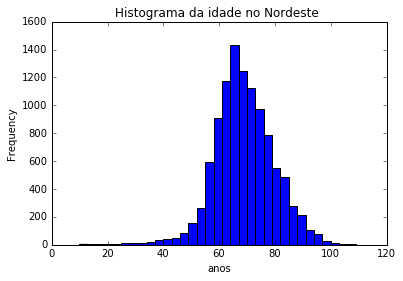

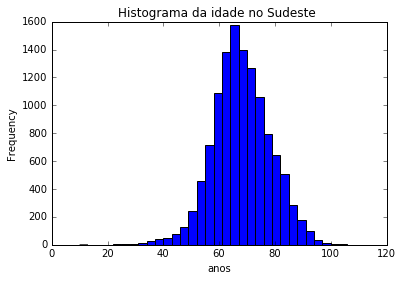

In [28]:
print("Renda Nordeste")
print(dados2014[dados2014.regiao=="Nordeste"].rend.describe(),"\n")
print("Renda Sudeste")
print(dados2014[dados2014.regiao=="Sudeste"].rend.describe(),"\n")
print("idade Nordeste")
print(dados2014[dados2014.regiao=="Nordeste"].idade.describe(),"\n")
print("idade Sudeste")
print(dados2014[dados2014.regiao=="Sudeste"].idade.describe(),"\n")
plot=dados2014[dados2014.regiao=="Nordeste"].idade.plot.hist(bins=faixa_idade)
plt.xlabel("anos")
plt.title("Histograma da idade no Nordeste ")
plt.show()
plot=dados2014[dados2014.regiao=="Sudeste"].idade.plot.hist(bins=faixa_idade)
plt.xlabel("anos")
plt.title("Histograma da idade no Sudeste ")

Esses gráficos nos motram que a idade média dos aposentados do Nordeste e Sudeste sem bem próximas, porém a média de renda do Sudeste é quase 1000 reais mais alta.

___
## Análise Nordeste e Sudeste Chefe de família
Agora além de estar divido em aposentados do Nordeste e do Sudeste, são só os chefes de família .

count    6889.000000
mean       68.817535
std         9.945975
min        18.000000
25%        62.000000
50%        68.000000
75%        75.000000
max       107.000000
Name: idade, dtype: float64 

count    8177.000000
mean       67.744772
std         9.832429
min        24.000000
25%        61.000000
50%        67.000000
75%        74.000000
max       107.000000
Name: idade, dtype: float64 



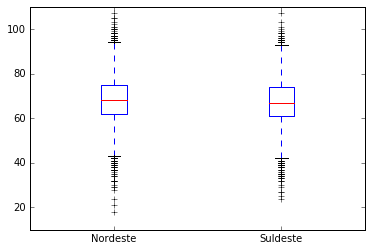

In [29]:
ida_NE=dados2014[dados2014.regiao=="Nordeste"].idade[dados2014.posicao_fam=="Chefe da casa"]
ida_SE=dados2014[dados2014.regiao=="Sudeste"].idade[dados2014.posicao_fam=="Chefe da casa"]
print(ida_NE.describe(),"\n")
print(ida_SE.describe(),"\n")
b0=pd.DataFrame([dados2014[dados2014.regiao=="Nordeste"].idade[dados2014.posicao_fam=="Chefe da casa"],dados2014[dados2014.regiao=="Sudeste"].idade[dados2014.posicao_fam=="Chefe da casa"]],index=("Nordeste","Suldeste"))
b0=b0.T
b0.plot.box()

count     6889.000000
mean      1607.646393
std       2335.371757
min        682.000000
25%        724.000000
50%        774.000000
75%       1448.000000
max      46000.000000
Name: rend, dtype: float64 

count      8177.000000
mean       2420.643145
std        4825.580777
min         690.000000
25%         724.000000
50%        1448.000000
75%        2500.000000
max      331200.000000
Name: rend, dtype: float64 



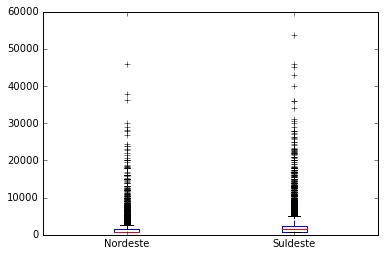

In [33]:
rend_NE=dados2014[dados2014.regiao=="Nordeste"].rend[dados2014.posicao_fam=="Chefe da casa"]
rend_SE=dados2014[dados2014.regiao=="Sudeste"].rend[dados2014.posicao_fam=="Chefe da casa"]
print(rend_NE.describe(),"\n")
print(rend_SE.describe(),"\n")
b1=pd.DataFrame([dados2014[dados2014.regiao=="Nordeste"].rend[dados2014.posicao_fam=="Chefe da casa"],dados2014[dados2014.regiao=="Sudeste"].rend[(dados2014.rend!= 331200)&(dados2014.posicao_fam=="Chefe da casa")]],index=("Nordeste","Suldeste"))
b1=b1.T
b1.plot.box()

Nordeste
count     6889.000000
mean      1607.646393
std       2335.371757
min        682.000000
25%        724.000000
50%        774.000000
75%       1448.000000
max      46000.000000
Name: rend, dtype: float64 



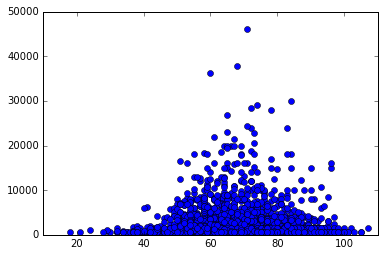

Sudeste
count     8176.000000
mean      2380.430406
std       3172.495107
min        690.000000
25%        724.000000
50%       1448.000000
75%       2500.000000
max      53800.000000
Name: rend, dtype: float64 



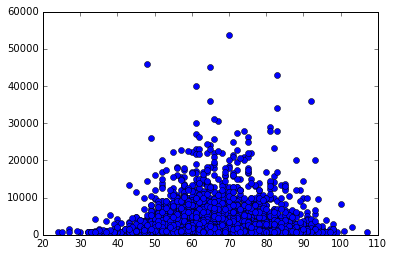

In [61]:
I_SE=dados2014[dados2014.regiao=="Sudeste"].idade[(dados2014.rend!= 331200)&(dados2014.posicao_fam=="Chefe da casa")]
R_SE=dados2014[dados2014.regiao=="Sudeste"].rend[(dados2014.rend!= 331200)&(dados2014.posicao_fam=="Chefe da casa")]
print("Nordeste")
print(rend_NE.describe(),"\n")
plt.plot(ida_NE,rend_NE,'o')
plt.show()
print("Sudeste")
print(R_SE.describe(),"\n")
plt.plot(ida_SE,R_SE,'o')
plt.show()

Coeficiente angular a:  -15.8245449997
Coeficiente linear b:  2993.02165298


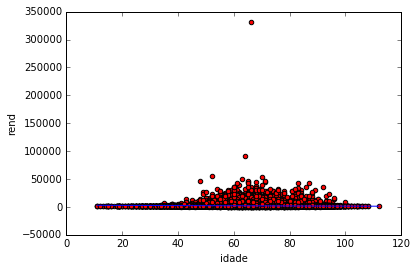

In [66]:
def linha_tendencia(dados2014, R_SE, I_SE):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dados2014[R_SE].cov(dados2014[I_SE]) / dados2014[R_SE].var()
    b = dados2014[I_SE].mean() - a * dados2014[R_SE].mean()

    dados2014.plot.scatter(x=R_SE, y=I_SE, color='red')

    import matplotlib.pyplot as plt
    plt.plot((dados2014[R_SE].min(), dados2014[R_SE].max()), (a * dados2014[R_SE].min() + b, a * dados2014[R_SE].max() + b), color='blue')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
linha_tendencia(dados2014,  "idade","rend")

Com essa nova qualificação as idades se mantem bem parecidas, porém a diferença entre a renda cresce, porem pelo grafíco de disperção de ponto podemos observar que grande maioria dos pontos estão próximos um do outro em ambos os casos, mas no Sudeste um aposentado possui uma renda muito maior que a maioria , crescendoumpouco a média, mas mesmo assim o Sudeste possui um grupo maior de aposentados com mais renda que no Nordeste.



___
## Conclusão 

Podemos concluir que os aposentados do Sudeste possui uma expectativa de vida muito similar as do Nordeste, porém possuem uma melhor qualidade de vida que os nordestinos, já que possuem uma renda um pouco maior.
Também percebemos que os números destas regiões estão de acordo com a média do Brasil.
Entretanto a diferença é tão pequena que pode-se dizer que é a relativamente igual ser um aposentado e morar no Sudeste e no Noredeste do Brasil.